# 6장 SVM (Support Vector Machine)

### <학습 목표>
- SVM 소개  
- 최적화를 위한 SMO 알고리즘    
- 데이터 변형을 위해 커널 사용하기
    - 데이터를 선형으로 분류할 수 없는 경우, 커널(Kernel)을 통해 고차원으로 변환
    - 새로운 차원에서 선형 분류가 가능한 최적의 초평면을 찾음
    - 이를 통해 본 차원에서 비선형 (Non-linearly) 분류가 가능해짐
    
    
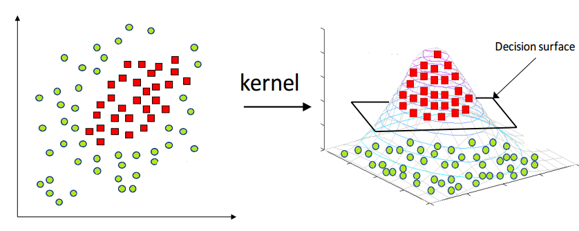

    
- 다른 분류와 지지 벡터 머신 비교하기

### 6.1 최대 마진으로 데이터 분류하기

- SVM이란?
    - 두 집합을 선형 분류(linearly separable)하는 최적의 초평면(hyperplane)을 찾는 알고리즘
    - 데이터가 p차원이라고 할 때, 초평면은 p-1차원에서 존재함
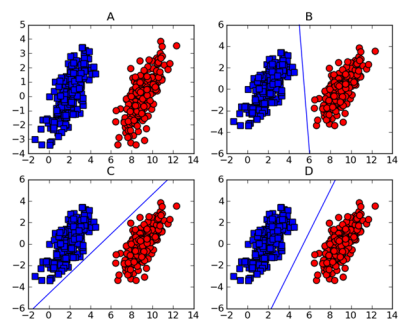


- 지지 벡터(support vector)와 마진(margin)이란?
    - 지지 벡터(support vector): 초평면 분리에 가장 가까운 지점
    - 마진(margin): 초평면과 지지 벡터 사이의 거리

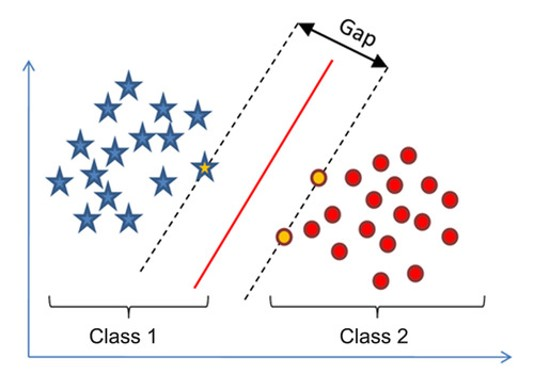


### 6.2 최대 마진 찾기
- 초평면과 가장 가까운 데이터(support vector)의 마진(margin)이 최대가 되도록 초평면을 최적화
- 학습용 데이터 집합 \\( D = \left \{(x_i, y_i) | x_i \in \mathbb{R}^p, y_i \in \left \{ -1, 1 \right \} \right \}^n _{i=1} \\) 
    - \\( x_i \\) : p차원의 실수 벡터
    - \\( y_i \\) : \\( x_i \\)가 어떤 클래스에 속해있을지의 값으로 1 혹은 -1의 값
    
    
- 초평면(hyperplane) = \\( \left\vert w^T \cdot x + b \right\vert \\) 
    - \\( \cdot \\) : 내적 연산자
    - \\( w^T \\) : 초평면의 법선 벡터(normal vector)
   
   
- \\(x\\) 데이터와 초평면 사이의 거리 = \\( \left\vert w^T \cdot x + b \right\vert / \lVert w \rVert \\) 
    - 점 \\( (x_1, y_1) \\)과 직선 \\( ax + by + c \\) 사이의 거리 =  \\( \left\vert ax_1 + by_1 + c \right\vert / \sqrt{a^2 + b^2} \\)
    
    
- \\(b\\)는 로지스틱 회귀에서 \\(w_0\\)처럼 오프셋(offset)임

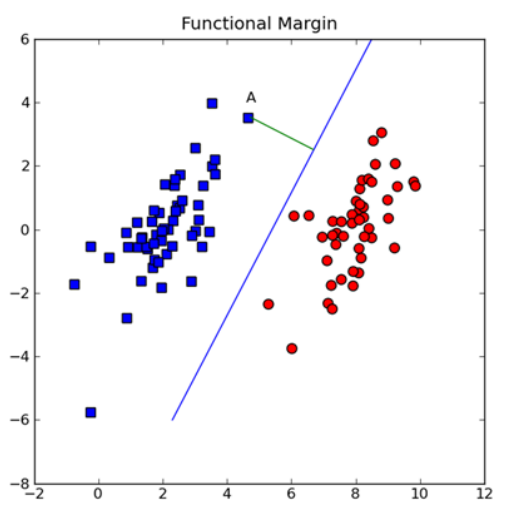


#### 6.2.1 분류가 관점에서의 최적화 문제 구성하기
- 마진(margin)
    - 헤비사이드 단계 함수 = \\(f(w^T \cdot x + b)\\); \\(f(u)\\) = -1 if \\(u\\) < 0, and 1 otherwise
    - 로지스틱 회귀는 분류 항목 표시가 0 또는 1이지만, SVM에서는 -1 또는 1로 설정됨
    - 이는 -1과 1은 단지 부호만 다르기 때문에 마진을 간단한 방정식으로 표현 가능하기 때문임 
    - 마진(margin) = \\(label \cdot (w^T \cdot x + b)\\); if \\(label\\) is -1 or 1
    - 한 점이 분리면으로부터 양의 방향으로 멀리 떨어져 있다면, \\(w^T \cdot x + b\\)는 큰 양수가 될 것이며 \\(label \cdot (w^T \cdot x + b)\\)는 큰 수를 얻음
    - 반대로 음의 방향으로부터 멀리 있고 음의 분류 항목 표시를 가진다고 해도 \\(label \cdot (w^T \cdot x + b)\\)는 큰 양수를 얻게 됨
- 최적화(optimization)
    - 목표는 마진이 가장 작은 점을 이용해 w와 b의 값을 찾고 분류기를 정의하는 것임
    - \\(argmax_{w,b}\{min_n(label \cdot (w^T \cdot x + b)) \cdot \frac{1}{\lVert w \rVert} \}\\)
    - \\( max_\alpha [\sum _{i=1} ^{m} \alpha - 1/2 \sum _{i,j=1} ^{m} label^{(i)} \cdot label^{(j)} \cdot a_i \cdot a_j <x^{(i)},x^{(j)}>] \\)


#### 6.2.2 일반적인 기본 구조로 SVM에 접근하기
1. 수집: 모든 방법
2. 준비: 수치형 값
3. 분석: 분리 초평면을 시각화하는 데 도움이 됨
4. 훈련: 대부분의 시간을 이 단계에서 소비함. 두 개의 매개변수는 이번 단계가 진행되는 동안 조정될 수 있음
5. 검사: 매우 간단한 계산이면 됨
6. 사용: 거의 모든 분류 문제에 SVM을 사용할 수 있으나, SVM은 이진 분류기라는 것에 주의해야 함. 분류 항목이 두 개 이상인 경우 SVM을 사용하기 위해서는 약간의 코드를 더 작성해야 함

### 6.3  SMO 알고리즘으로 효율적인 최적화하기

#### 6.3.1 플랫의 SMO 알고리즘
- 1996년, 존 플랫은 지지 벡터 머신을 훈련시키기 위해 SMO라는 알고리즘을 발표함
- SMO는 순차적 최소 최적화(Sequential Minimal Optimization)의 약어로, 큰 문제들을 작은 문제들로 나눔
- 이렇게 나뉜 작은 문제들은 쉽게 해결할 수 있기 때문에, 이 작은 문제들을 순차적으로 해결함으로써 큰 문제를 한 번에 해결하는 것과 같은 답을 얻을 수 있음
- SMO 알고리즘은 알파와 \\(b\\)의 집합을 찾아 가중치 \\(w\\)를 계산하여 분리 초평면을 구하기 위한 것임
- SMO 알고리즘 작동 방식:
    - 각각의 사이클을 최적화하기 위해 두 개의 알파를 선택함
    - 적당한 알파의 쌍을 찾게 되면, 그 중 하나의 값을 증가시키고 다른 하나는 줄임
    - 적당한 알파를 구하기 위해서는 알파 집합이 조건을 정확하게 충족해야 함
    - 조건1: 알파 쌍 모두가 그들의 마진 경계 밖에 있어야 함
    - 조건2: 알파가 이미 고정되어 잇거나 경계를 갖지 않아야 함
   
#### 6.3.2 간략한 형태의 SMO로 적은 양의 데이터 집합 해결하기
1. 데이터 집합에 있는 모든 알파를 대상으로 알파의 쌍을 선택함
2. 남아 있는 알파들에서 임의로 두 번째 알파를 선택함 (이 때, 두 알파를 동시에 변경해야 함  \\( \sum{a_i \cdot label^{(i)}}=0 \\) )
3. 임의로 하나의 정수를 선택하기 위한 도움 함수를 생성함
4. 너무 큰 값을 얻지 않도록 값을 고정하는 도움 함수를 생성함

In [4]:
def loadDataSet(filename):
    dataMat = []; labelMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

# 3. 임의로 하나의 정수를 선택하기 위한 함수
#  - i: 첫 번째 알파의 색인
#  - m: 알파 전체의 개수
def selectJrand(i, m):
    j=i
    while(j==i):  # i와 동일하지 않을 때 까지 반복
        j = int(random.uniform(0, m))
    return j

# 4. 너무 큰 값을 얻지 않도록 값을 고정하는 함수
#  - aj: 알파 값
#  - H: 최대 알파 값
#  - L: 최소 알파 값
def clipAlpha(aj, H, L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

In [5]:
dataArr, labelArr = loadDataSet('data/testSet.txt')
print(dataArr)
print(labelArr)

[[3.542485, 1.977398], [3.018896, 2.556416], [7.55151, -1.58003], [2.114999, -0.004466], [8.127113, 1.274372], [7.108772, -0.986906], [8.610639, 2.046708], [2.326297, 0.265213], [3.634009, 1.730537], [0.341367, -0.894998], [3.125951, 0.293251], [2.123252, -0.783563], [0.887835, -2.797792], [7.139979, -2.329896], [1.696414, -1.212496], [8.117032, 0.623493], [8.497162, -0.266649], [4.658191, 3.507396], [8.197181, 1.545132], [1.208047, 0.2131], [1.928486, -0.32187], [2.175808, -0.014527], [7.886608, 0.461755], [3.223038, -0.552392], [3.628502, 2.190585], [7.40786, -0.121961], [7.286357, 0.251077], [2.301095, -0.533988], [-0.232542, -0.54769], [3.457096, -0.082216], [3.023938, -0.057392], [8.015003, 0.885325], [8.991748, 0.923154], [7.916831, -1.781735], [7.616862, -0.217958], [2.450939, 0.744967], [7.270337, -2.507834], [1.749721, -0.961902], [1.803111, -0.176349], [8.804461, 3.044301], [1.231257, -0.568573], [2.074915, 1.41055], [-0.743036, -1.736103], [3.536555, 3.96496], [8.410143, 0.0

##### Pseudocode for the SMO algorithm
- Create an alphas vector filled with 0s
- // 초기값을 0으로 하는 알파 벡터 생성
- While the number of iterations is less than MaxIterations:
- // 반복 횟수가 MaxIterations보다 작을 때까지 반복
    - For every data vector in the dataset:
    - // 데이터 집합에 있는 모든 데이터 벡터를 반복
        - If the data vector can be optimized:
        - // 데이터 벡터가 최적화될 수 있다면
            - Select anohter data vector at random
            - // 임의로 다른 데이터 벡터를 선택
            - Optimize the two vectors togeter
            - // 두 벡터를 모두 최적화
            - If the vectors can't be optimized -> break
            - // 벡터를 최적화할 수 없다면 -> 멈춤
    - If no vectors were optimized -> increment the iteration count
    - // 최적화된 벡터가 없다면 -> 반복 횟수를 증가

In [20]:
from numpy import *

# 간략한 형태의 SMO 알고리즘
#  - dataMatIn: 데이터 집합  [[x1, y1], [x2, y2], ...]
#  - classLabels: 분류 항목 표시 [1, -1, ...]
#  - C: 상수 C
#  - toler: 오차 범위(tolerance)
#  - maxIter: 최대 반복 횟수
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = mat(dataMatIn) # [[x1, y1], [x2, y2], ...]
    labelMat = mat(classLabels).transpose()  # [[1], [-1], ...]
    m,n = shape(dataMatrix)  # m: 샘플 수, n: 차원 수
    b = 0
    alphas = mat(zeros((m,1)))  # [[0], [0], ...] (m 길이)
    iter = 0
    while (iter < maxIter):  # 최대 반복 횟수까지 반복
        alphaPairsChanged = 0  # 어떤 알파의 최적화를 시도할 경우 기록하기 위한 변수
        for i in range(m):
            fXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b  # 예측값 계산 (w^T * x + b)
            Ei = fXi - float(labelMat[i]) # 오류 계산 (예측값 - label)
            # 오류가 오차 범위를 벗어난다면 최적화 시도
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)): 
                j = selectJrand(i,m)  # 임의로 두 번째 알파 선택
                fXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b  # 두 번째 알파로 예측값 계산
                Ej = fXj - float(labelMat[j])  # 오류 계산
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();  # 이전 알파값 기록
                # 알파가 0과 C 사이의 값이 되도록 함
                if (labelMat[i] != labelMat[j]):  
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H:  # L과 H가 동일하다면 최적화할 수 없음
                    #print("L==H")
                    continue
                # 알파값을 변경하기 위한 최적화된 계수
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0:   # 에타값이 0보다 크면 최적화할 수 없음
                               # 에타값이 0이면 계산이 복잡하기 때문에 여기서는 다루지 않음
                    #print("eta>=0")
                    continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j],H,L)  # j의 알파값을 새로 계산하고 갱신
                if (abs(alphas[j] - alphaJold) < 0.00001): 
                    print("j not moving enough")
                    continue
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j]) # 반대쪽에 있는 j와 동일하게 계산된 값으로 i를 갱신
                # 상수 b를 갱신
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1  # 알파값이 최적화되었음을 기록
                #print("iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
        if (alphaPairsChanged == 0): iter += 1  # 최적화된 벡터가 없다면 -> 반복 횟수를 증가
        else: iter = 0  # 최적화된 벡터가 있다면 -> 반복 횟수 초기화
        print("iteration number: %d" % iter)
    return b,alphas

In [25]:
b, alphas = smoSimple(dataArr, labelArr, 0.6, 0.001, 40)
print(b)
print(alphas[alphas>0])

j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough


j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough


j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 10
j not moving enough

iteration number: 12
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
j not moving enough
iteration number: 10
j not moving enough
j not moving enough
iteration number: 11
j not moving enough
j not moving enough
iteration number: 12
j not moving enough
j not moving enough
iteration number: 13
j not moving enough
j not moving enough
iteration number: 14
j not moving enough
j not moving enough
iteration numb

In [23]:
print(shape(alphas[alphas>0]))
for i in range(100):
    if alphas[i]>0.0: print(dataArr[i],labelArr[i])

(1, 4)
[4.658191, 3.507396] -1.0
[3.457096, -0.082216] -1.0
[5.286862, -2.358286] 1.0
[6.080573, 0.418886] 1.0


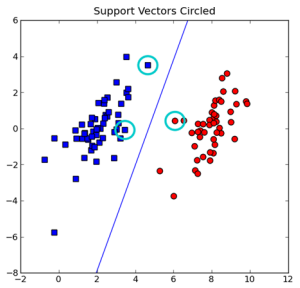

### 6.4 Speeding up optimization with the full Platt SMO

In [20]:
def kernelTrans(X, A, kTup): #calc the kernel or transform data to a higher dimensional space
    m,n = shape(X)
    K = mat(zeros((m,1)))
    if kTup[0]=='lin': K = X * A.T   #linear kernel
    elif kTup[0]=='rbf':
        for j in range(m):
            deltaRow = X[j,:] - A
            K[j] = deltaRow*deltaRow.T
        K = exp(K/(-1*kTup[1]**2)) #divide in NumPy is element-wise not matrix like Matlab
    else: raise NameError('Houston We Have a Problem -- \
    That Kernel is not recognized')
    return K

class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler, kTup):  # Initialize the structure with the parameters 
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = shape(dataMatIn)[0]
        self.alphas = mat(zeros((self.m,1)))
        self.b = 0
        self.eCache = mat(zeros((self.m,2))) #first column is valid flag
        self.K = mat(zeros((self.m,self.m)))
        for i in range(self.m):
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)
        
def calcEk(oS, k):
    fXk = float(multiply(oS.alphas,oS.labelMat).T*oS.K[:,k] + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek
        
def selectJ(i, oS, Ei):         #this is the second choice -heurstic, and calcs Ej
    maxK = -1; maxDeltaE = 0; Ej = 0
    oS.eCache[i] = [1,Ei]  #set valid #choose the alpha that gives the maximum delta E
    validEcacheList = nonzero(oS.eCache[:,0].A)[0]
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:   #loop through valid Ecache values and find the one that maximizes delta E
            if k == i: continue #don't calc for i, waste of time
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej
    else:   #in this case (first time around) we don't have any valid eCache values
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
    return j, Ej

def updateEk(oS, k):#after any alpha has changed update the new value in the cache
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1,Ek]
    
def innerL(i, oS):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #this has been changed from selectJrand
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: print "L==H"; return 0
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j] #changed for kernel
        if eta >= 0: print "eta>=0"; return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #added this for the Ecache
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print "j not moving enough"; return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j
        updateEk(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,i] - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[i,j]
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,j]- oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[j,j]
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0 
    
def smoP(dataMatIn, classLabels, C, toler, maxIter,kTup=('lin', 0)):    #full Platt SMO
    oS = optStruct(mat(dataMatIn),mat(classLabels).transpose(),C,toler, kTup)
    iter = 0
    entireSet = True; alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:   #go over all
            for i in range(oS.m):        
                alphaPairsChanged += innerL(i,oS)
                print "fullSet, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        else:#go over non-bound (railed) alphas
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                print "non-bound, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        if entireSet: entireSet = False #toggle entire set loop
        elif (alphaPairsChanged == 0): entireSet = True  
        print "iteration number: %d" % iter
    return oS.b,oS.alphas

In [21]:
dataArr,labelArr = loadDataSet('data/testSet.txt')
b,alphas = smoP(dataArr, labelArr, 0.6, 0.001, 40)

L==H
fullSet, iter: 0 i:0, pairs changed 0
L==H
fullSet, iter: 0 i:1, pairs changed 0
fullSet, iter: 0 i:2, pairs changed 1
L==H
fullSet, iter: 0 i:3, pairs changed 1
fullSet, iter: 0 i:4, pairs changed 2
fullSet, iter: 0 i:5, pairs changed 2
fullSet, iter: 0 i:6, pairs changed 2
j not moving enough
fullSet, iter: 0 i:7, pairs changed 2
L==H
fullSet, iter: 0 i:8, pairs changed 2
fullSet, iter: 0 i:9, pairs changed 2
L==H
fullSet, iter: 0 i:10, pairs changed 2
L==H
fullSet, iter: 0 i:11, pairs changed 2
L==H
fullSet, iter: 0 i:12, pairs changed 2
fullSet, iter: 0 i:13, pairs changed 2
L==H
fullSet, iter: 0 i:14, pairs changed 2
fullSet, iter: 0 i:15, pairs changed 2
fullSet, iter: 0 i:16, pairs changed 2
L==H
fullSet, iter: 0 i:17, pairs changed 2
fullSet, iter: 0 i:18, pairs changed 3
fullSet, iter: 0 i:19, pairs changed 3
fullSet, iter: 0 i:20, pairs changed 3
fullSet, iter: 0 i:21, pairs changed 3
j not moving enough
fullSet, iter: 0 i:22, pairs changed 3
L==H
fullSet, iter: 0 i:23, 

In [22]:
def calcWs(alphas,dataArr,classLabels):
    X = mat(dataArr); labelMat = mat(classLabels).transpose()
    m,n = shape(X)
    w = zeros((n,1))
    for i in range(m):
        w += multiply(alphas[i]*labelMat[i],X[i,:].T)
    return w

In [25]:
ws=calcWs(alphas,dataArr,labelArr)
print ws

[[ 0.65307162]
 [-0.17196128]]


#### 6.5 Using kernels for more complex data

##### 6.5.1 Mapping data to higher dimensions with kernels

##### 6.5.2 The radial bias function as a kerne

In [26]:
def kernelTrans(X, A, kTup): #calc the kernel or transform data to a higher dimensional space
    m,n = shape(X)
    K = mat(zeros((m,1)))
    if kTup[0]=='lin': K = X * A.T   #linear kernel
    elif kTup[0]=='rbf':
        for j in range(m):
            deltaRow = X[j,:] - A
            K[j] = deltaRow*deltaRow.T
        K = exp(K/(-1*kTup[1]**2)) #divide in NumPy is element-wise not matrix like Matlab
    else: raise NameError('Houston We Have a Problem -- \
    That Kernel is not recognized')
    return K

class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler, kTup):  # Initialize the structure with the parameters 
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = shape(dataMatIn)[0]
        self.alphas = mat(zeros((self.m,1)))
        self.b = 0
        self.eCache = mat(zeros((self.m,2))) #first column is valid flag
        self.K = mat(zeros((self.m,self.m)))
        for i in range(self.m):
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)
            
def innerL(i, oS):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #this has been changed from selectJrand
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: print "L==H"; return 0
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j] #changed for kernel
        if eta >= 0: print "eta>=0"; return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #added this for the Ecache
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print "j not moving enough"; return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j
        updateEk(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,i] - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[i,j]
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,j]- oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[j,j]
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0
    
def calcEk(oS, k):
    fXk = float(multiply(oS.alphas,oS.labelMat).T*(oS.X*oS.X[k,:].T)) + oS.b
    Ek = fXk - float(oS.labelMat[k])
    return Ek

##### 6.5.3 Using a kernel for testing

In [29]:
def testRbf(k1=1.3):
    dataArr,labelArr = loadDataSet('data/testSetRBF.txt')
    b,alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, ('rbf', k1)) #C=200 important
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    svInd=nonzero(alphas.A>0)[0]
    sVs=datMat[svInd] #get matrix of only support vectors
    labelSV = labelMat[svInd];
    print "there are %d Support Vectors" % shape(sVs)[0]
    m,n = shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],('rbf', k1))
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1
    print "the training error rate is: %f" % (float(errorCount)/m)
    dataArr,labelArr = loadDataSet('data/testSetRBF2.txt')
    errorCount = 0
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    m,n = shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],('rbf', k1))
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1    
    print "the test error rate is: %f" % (float(errorCount)/m)    

In [30]:
testRbf()

L==H
fullSet, iter: 0 i:0, pairs changed 0
fullSet, iter: 0 i:1, pairs changed 1
fullSet, iter: 0 i:2, pairs changed 1
fullSet, iter: 0 i:3, pairs changed 2
fullSet, iter: 0 i:4, pairs changed 3
fullSet, iter: 0 i:5, pairs changed 4
fullSet, iter: 0 i:6, pairs changed 4
fullSet, iter: 0 i:7, pairs changed 5
fullSet, iter: 0 i:8, pairs changed 5
j not moving enough
fullSet, iter: 0 i:9, pairs changed 5
fullSet, iter: 0 i:10, pairs changed 6
fullSet, iter: 0 i:11, pairs changed 7
fullSet, iter: 0 i:12, pairs changed 8
fullSet, iter: 0 i:13, pairs changed 9
fullSet, iter: 0 i:14, pairs changed 10
fullSet, iter: 0 i:15, pairs changed 11
fullSet, iter: 0 i:16, pairs changed 12
fullSet, iter: 0 i:17, pairs changed 12
fullSet, iter: 0 i:18, pairs changed 13
fullSet, iter: 0 i:19, pairs changed 14
fullSet, iter: 0 i:20, pairs changed 15
fullSet, iter: 0 i:21, pairs changed 16
fullSet, iter: 0 i:22, pairs changed 17
fullSet, iter: 0 i:23, pairs changed 18
fullSet, iter: 0 i:24, pairs changed 19

#### 6.6 Example: revisiting handwriting classification

In [36]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

def loadImages(dirName):
    from os import listdir
    hwLabels = []
    trainingFileList = listdir(dirName)           #load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        if classNumStr == 9: hwLabels.append(-1)
        else: hwLabels.append(1)
        trainingMat[i,:] = img2vector('%s/%s' % (dirName, fileNameStr))
    return trainingMat, hwLabels    

def testDigits(kTup=('rbf', 10)):
    dataArr,labelArr = loadImages('data/digits/trainingDigits')
    b,alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, kTup)
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    svInd=nonzero(alphas.A>0)[0]
    sVs=datMat[svInd] 
    labelSV = labelMat[svInd];
    print "there are %d Support Vectors" % shape(sVs)[0]
    m,n = shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],kTup)
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1
    print "the training error rate is: %f" % (float(errorCount)/m)
    dataArr,labelArr = loadImages('data/digits/testDigits')
    errorCount = 0
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    m,n = shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],kTup)
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1    
    print "the test error rate is: %f" % (float(errorCount)/m) 

In [ ]:
testDigits(('rbf', 20))

L==H
fullSet, iter: 0 i:0, pairs changed 0
fullSet, iter: 0 i:1, pairs changed 1
j not moving enough
fullSet, iter: 0 i:2, pairs changed 1
fullSet, iter: 0 i:3, pairs changed 2
fullSet, iter: 0 i:4, pairs changed 2
fullSet, iter: 0 i:5, pairs changed 2
fullSet, iter: 0 i:6, pairs changed 2
fullSet, iter: 0 i:7, pairs changed 2
fullSet, iter: 0 i:8, pairs changed 2
fullSet, iter: 0 i:9, pairs changed 2
fullSet, iter: 0 i:10, pairs changed 2
fullSet, iter: 0 i:11, pairs changed 2
fullSet, iter: 0 i:12, pairs changed 2
fullSet, iter: 0 i:13, pairs changed 2
fullSet, iter: 0 i:14, pairs changed 2
fullSet, iter: 0 i:15, pairs changed 2
fullSet, iter: 0 i:16, pairs changed 2
fullSet, iter: 0 i:17, pairs changed 2
fullSet, iter: 0 i:18, pairs changed 2
fullSet, iter: 0 i:19, pairs changed 3
fullSet, iter: 0 i:20, pairs changed 3
fullSet, iter: 0 i:21, pairs changed 3
fullSet, iter: 0 i:22, pairs changed 3
fullSet, iter: 0 i:23, pairs changed 3
fullSet, iter: 0 i:24, pairs changed 3
fullSet, i